<a class="anchor" id="16"></a>
#### Content
* [Instantiate a multiplex network object](#1), and filter edges with lower-than-threshold weights

* [High-level properties, e.g., layer-wise similarities of the multiplex network](#2)
* [Compute structural coefficients (e.g., multiplex PageRank centrality)](#3)

In [1]:
from src import demo
from src.utils import *
import pandas as pd
import numpy as np
import scipy
import copy
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt

<a class="anchor" id="1"></a>
Assume the multiplex network has been built (check py_multiplex_network_knn_scRNAseq.ipynb), and the intermediate files (tissue objects) are stored in an isolated folder 'GO_BP'. 

In [2]:
nt = demo.tissue_obj_multiplex_network(collection = "GO-BP", labels = None, folder = 'GO_BP')

In [3]:
with open("BP.json") as f:
    BP:dict = json.load(f)
with open("BP.TERM.json") as f:
    BP_term:dict = json.load(f)
GO_BP_ID = list(BP.keys())
GO_BP_gs_name = BP_term 
GO_BP_gene_set = list(BP.values())
print(f"GO_BP database has {len(GO_BP_gene_set )} gene sets.")

GO_BP database has 16029 gene sets.


In [4]:
### Compute the Jaccard coefficients 
nt.load_Jaccard(self_loop = True)
### Filter edges whose weights are less than 0.1.
nt.call_adj_filter_tr(q = None, tr = 0.1)

Computing the Jaccard coefficient similarity matrix ...


<a class="anchor" id="2"></a>

high-level properties of the multiplex network:\
    $\qquad$ layer similarity \
    $\qquad$ multiplex community
    

In [5]:
cell_label = copy.deepcopy(nt.layer_ns)
cell_label.insert(0, 'Jaccard')

In [6]:
nt.community_detection_MVP_per_layer(MVP_para = {'weights': "weight", 'n_iterations':-1, 'seed':123}, Jaccard = True)
nt.NMI_layers()
layer_similarity = nt.multiplex_property['inter-layer similarity']


100%|█████████████████████████████████████████████| 5/5 [00:58<00:00, 11.74s/it]


<a class="anchor" id="11"></a>

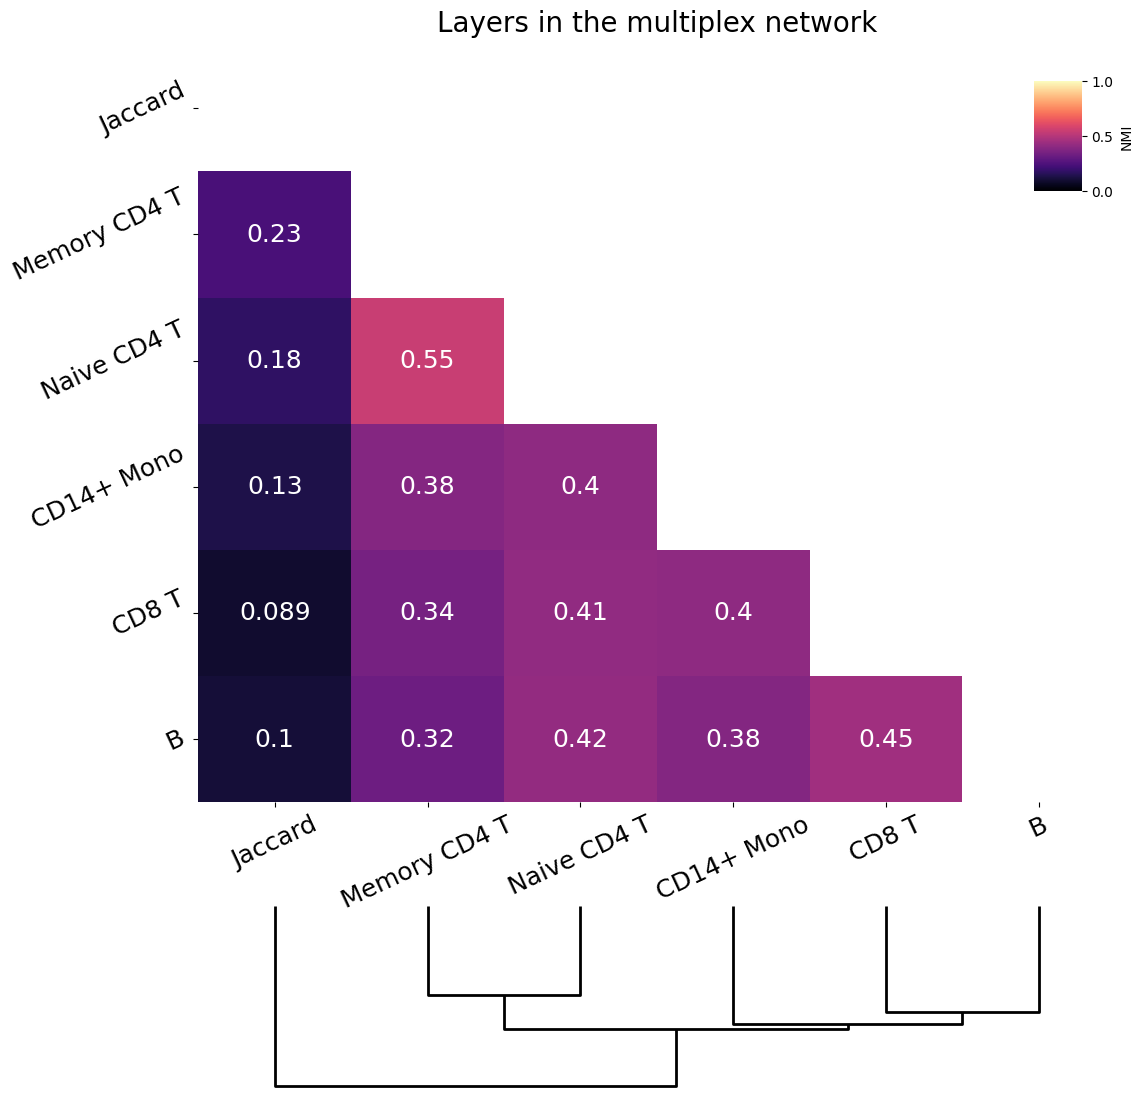

In [10]:
g = visualization.vis_clustermap(sim_mat = layer_similarity, figsize=(12,10), label_lst = cell_label, row = False, cbar_kws ={"label":"NMI", "shrink":1}, dendro_mov = (0, -1.05),\
                    cbar_pos = (0.9,0.65, 0.04,0.11),\
                  fontsize = 18, tick_rotation = 25, title = "Layers in the multiplex network", title_font_size = 20)

g.fig

In [8]:
### Modularity Vertex Partition, mininal size of a cluster is set to be 200.
nt.community_detection_MVP(min_cluster = 200, MVP_para = {'weights': "weight", 'n_iterations':-1, 'seed':123})

In [17]:
membership = np.array(nt.community_detection['MVP'][0]) 
np.unique(membership, return_counts = True)

(array([0, 1, 2, 3, 4]), array([2238, 1617,  338,  327,  816]))

<a class="anchor" id="3"></a>
At the scale of individual gene sets, compute their structural coefficients

In [10]:
C1 = nt.C_1()
C2 = nt.C_2()
### Compared to the uniform distribution
mpg = nt.multiplex_page_rank()
mpg = mpg/(1/len(mpg))
jpg = nt.Jaccard_page_rank()
jpg = jpg/(1/len(jpg))

The raw C1 coefficients contain 0 missing values.
The raw C2 coefficients contain 1 missing values.
The missing values have been replaced by the minimal non-missing value:0.004.
Finish computing multiplex PageRank coefficients!
The raw monoplex PageRank coefficients contain 0 missing values.
Finish computing PageRank coefficients for Jaccard!


In [11]:
O, P = nt.multiplex_participation_coefficient(replace = False)

In [12]:
gene_set_size = np.array([len(item) for item in GO_BP_gene_set])[nt.common_gs_index]
items = [O, P, C1, C2, mpg, jpg, gene_set_size]   
items = [np.round(item, 2) for item in items]
labels = ['Total weight', 'P', 'C1', 'C2', 'Multiplex PageRank', 'PageRank-Jaccard', 'gene set size']

In [13]:
data = pd.DataFrame(data = np.array(items).transpose(), columns = labels)
data['multiplex community'] = membership.astype('int')

<Figure size 144x144 with 0 Axes>

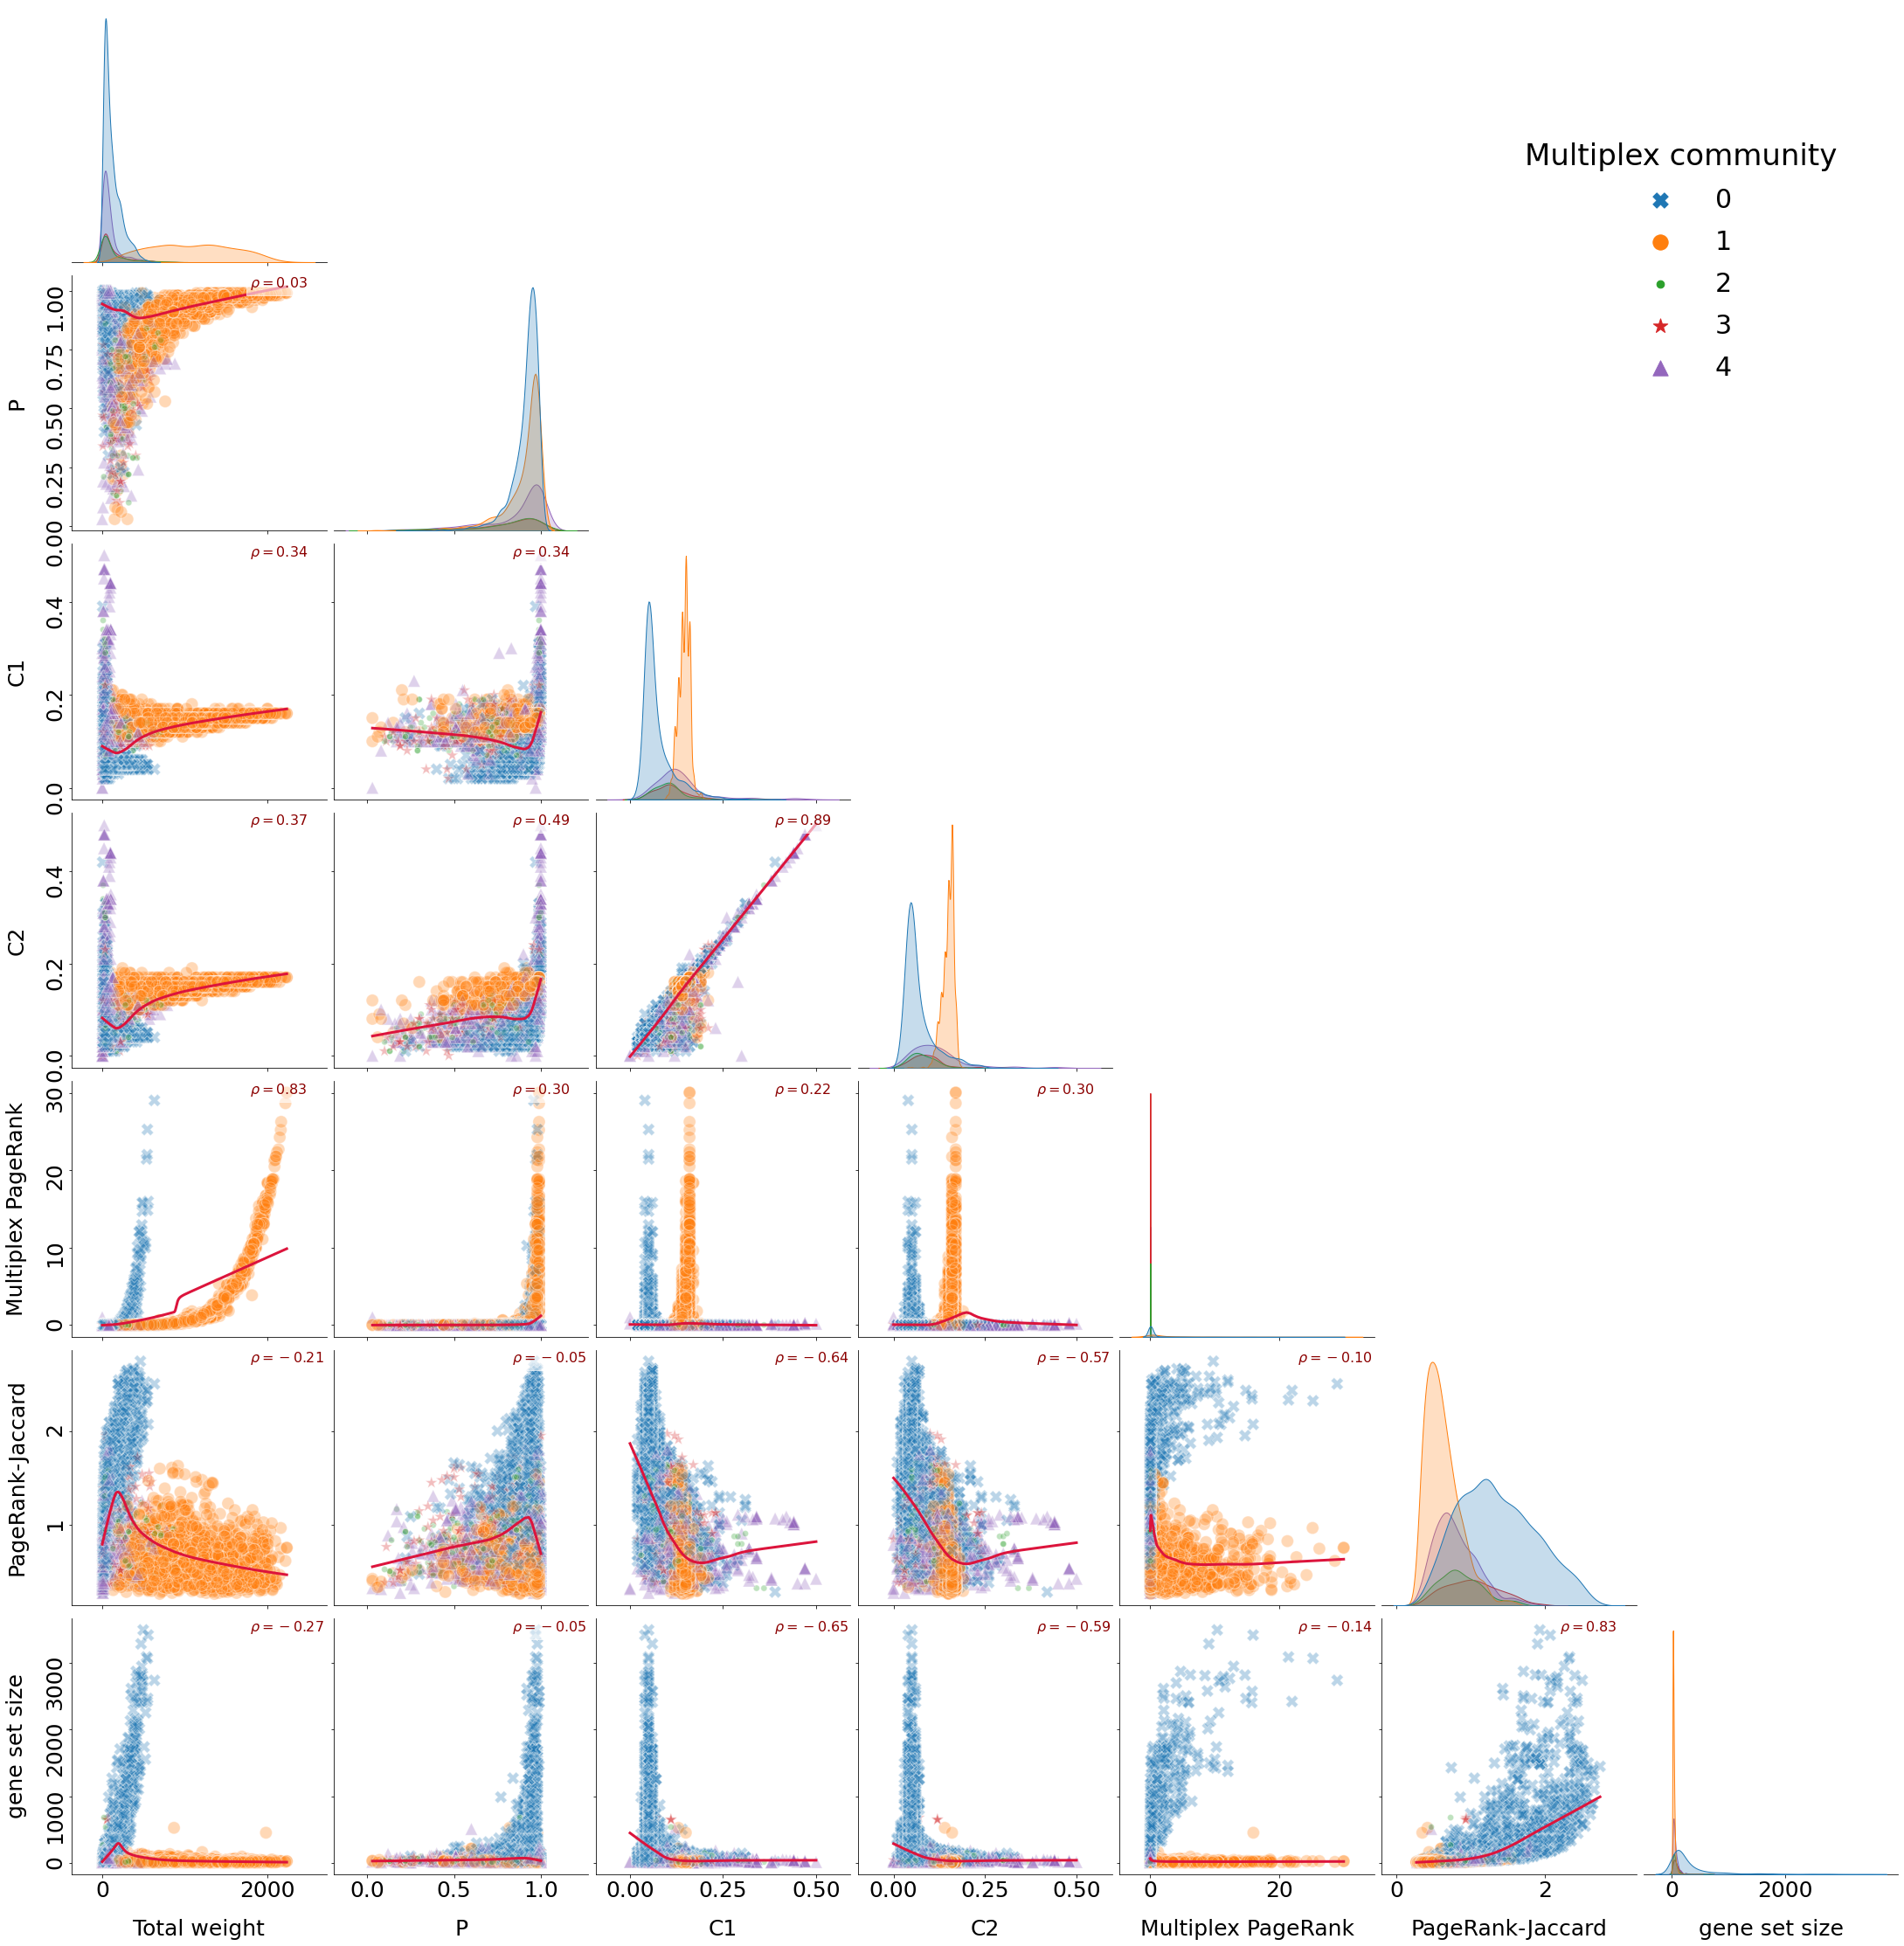

In [84]:
fig = visualization.vis_attr_pair_plot(data, figsize = (2,2), legend_font_size = 35, \
                                       title_font_size = 35, tick_label_font_size = 25, \
                                       height = 4.5)

[Top Page](#16)